# Group Project: Data-driven Business Manager with APIs

#### Number of points: 30 (weights 30% in the final grade)
#### Deadline to form the groups: October 18th at 12:30 pm CET
#### Deadline for the code submission: October 24th at 01:29 pm CET
#### Presentations on October 24th

## Objective
In this project, you will create a Business that utilizes various APIs to make informed decisions about running your local business. If you want to sell drinks or street food or whatever floats your boat, do not hesitate to find your data and design the project accordingly. You will collect data from meteorological and non-meteorological APIs to help your business determine when, where, and how much inventory is needed to maximize sales. 

## Grading

In total, the group project counts for 30% of the final grade and represents 30 points.

The points are distributed in two parts: the code and the presentation.

- Some items e.g. Statistics are represented in both parts and will require to compute them in the code **and** present them during the presentation.
- Please note that the data must come from an API. You need to use at least 3 APIs (weather + two others). You can also of course use data downloaded from the internet, however they cannot replace the API data.
- Additionally, emphasis will be put on the **Storytelling** and whether or not the choice of APIs, data processing, statistics and visualisations are relevant for your business.
- To make grading easier, please provide **clean code** with **relevant comments** to make it straightforward what you are doing.
- Everyone in the group project must present during presentation day. **A penalty of -2 points** will be applied to each person **who does not present a significant part** during the presentation.


| **Code** | **15 points** |
| --- | --- |
| A. Collect data from weather API | 3 points |
| B. Collect data from two other non-meteorological APIs | 4 points |
| C. Data cleaning and processing | 3 points |
| D. Compute relevant statistics | 2 points |
| E. Clean and clear visualisations  | 3 points |


| **Presentation** | **15 points** |
| --- | --- |
| 1. Description of unique business idea | 1 point |
| 2. Presentation of all the APIs used and how it serves your business | 3 points |
| 3. Presentation of the data cleaning and processing | 2 points |
| 4. Presentation of the statistics | 2 points |
| 5. Presentation of the visualisations and how they serve the business| 3 points |
| 6. Storytelling | 4 points |

**Penalty: -2 points to each person who does not present a significant part during the presentation.**


**Penalty for unexcused absence or lateness**: 
- If you are absent or late on presentation day without an official excuse, you will receive 0 for the presentation part of the group project.
- If you are late without an official excuse and can still make it to the presentation of your team, you will still receive 0 for the presentation part of the group project.

## Getting Ready
#### Recommended deadline: October 8th
#### Deadline: October 18th at 12:30 pm CET

1. Form your group and select a group name. Communicate your group name to the teacher along with the First Name and Last Name of all the team members.

2. Create a branch on the **Students** repository with your group name (exactly the same as the one communicated to the teacher).

3. Discuss with your group and answer the following questions:

   - What kind of business do we run? What do we sell ? The choice of the business must be original and unique to your group.
   - How do we name our business?
   - When do we operate? Is it an all-year-round business or a seasonal one? If so, which seasons? Which months / weeks / days / hours of the day do we operate?
   - Where do we operate? In which countries / cities are we currently active ? Where do we want to develop in the future ? Determine where to set up your business stand based on weather conditions, local attractions, or events. The location should maximize customer traffic and sales.

## Code | A. Collect data from weather API | 3 points
#### Recommended deadline: October 18th
#### Deadline: October 24th at 01:29 pm CET
Use the OpenWeatherMap API to fetch weather data for your chosen location. You can select any city or location for your business.

- Fetch your chosen location's current temperature and weather conditions.
- Fetch the forecasted weather data for the next few days (e.g., five days).

In [9]:
# Importing requests packages
import pandas as pd
import requests
import time
from datetime import datetime, timedelta

In [10]:
# Use double quotes to assign your API key to private_api_key variable as a string
private_api_key = ""

In [11]:
# Function to convert datetime to Unix timestamp
def datetime_to_unix(dt):
    return int(dt.timestamp())

# Function to make the API call for a specific timestamp
def fetch_daily_data(dt_unix):
    params = {
        "lat": 52.5486,
        "lon": 13.2547,
        "units": "metric",
        "dt": dt_unix,
        "appid": private_api_key
    }
    response = requests.get("https://api.openweathermap.org/data/3.0/onecall/timemachine", params=params)
    return response.json()

In [12]:
# Collecting Historical Data(Last heating period)
# Starting and ending datetime
start_date = datetime(2023, 9, 30, 13, 0)  # 2023-09-30 11:00
end_date = datetime(2024, 4, 30, 13, 0)    # 2024-04-30 11:00

# Create a list of hourly timestamps from start_date to end_date
current_date = start_date
hourly_dates = []
while current_date <= end_date:
    hourly_dates.append(current_date)
    current_date += timedelta(days=1)  # Move to the next hour

# Collect all the hourly data
all_data = []

# Loop through each hour's timestamp and fetch the weather data
for dt in hourly_dates:
    dt_unix = datetime_to_unix(dt)  # Convert to Unix timestamp
    data = fetch_daily_data(dt_unix)
    all_data.append(data)

# Convert the collected data to a DataFrame
df_historical = pd.DataFrame(all_data)
df_historical

,lat,lon,timezone,timezone_offset,data
0,52.5486,13.2547,Europe/Berlin,7200,"[{'dt': 1696071600, 'sunrise': 1696050330, 'su..."
1,52.5486,13.2547,Europe/Berlin,7200,"[{'dt': 1696158000, 'sunrise': 1696136832, 'su..."
2,52.5486,13.2547,Europe/Berlin,7200,"[{'dt': 1696244400, 'sunrise': 1696223334, 'su..."
3,52.5486,13.2547,Europe/Berlin,7200,"[{'dt': 1696330800, 'sunrise': 1696309836, 'su..."
4,52.5486,13.2547,Europe/Berlin,7200,"[{'dt': 1696417200, 'sunrise': 1696396338, 'su..."
...,...,...,...,...,...
209,52.5486,13.2547,Europe/Berlin,7200,"[{'dt': 1714129200, 'sunrise': 1714103084, 'su..."
210,52.5486,13.2547,Europe/Berlin,7200,"[{'dt': 1714215600, 'sunrise': 1714189362, 'su..."
211,52.5486,13.2547,Europe/Berlin,7200,"[{'dt': 1714302000, 'sunrise': 1714275641, 'su..."
212,52.5486,13.2547,Europe/Berlin,7200,"[{'dt': 1714388400, 'sunrise': 1714361922, 'su..."


In [13]:
# Collecting Historical Data(Last heating period)
# Explode the 'data' column to separate the dictionaries into rows
df_hist_exploded = df_historical.explode('data')

# Normalize the exploded 'data' column
df_hist_normalized = pd.json_normalize(df_hist_exploded['data'])
df_hist_normalized['dt'] = pd.to_datetime(df_hist_normalized['dt'], unit='s').dt.strftime('%Y-%m-%d %H:%M:%S')

# Step 4: Explode the 'weather' column
hist_exploded_df = df_hist_normalized.explode('weather')

# Step 5: Normalize the dictionaries in the 'weather' column
weather_hist_df = pd.json_normalize(hist_exploded_df['weather'])

# Step 6: Drop the original 'weather' column
hist_exploded_df = hist_exploded_df.drop(columns=['weather'])

# Step 7: Concatenate the new weather DataFrame back to the original DataFrame
weather_hist_final = pd.concat([hist_exploded_df, weather_hist_df], axis=1)
weather_hist_final

,dt,sunrise,sunset,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,wind_gust,rain.1h,snow.1h,id,main,description,icon
0,2023-09-30 11:00:00,1696050330,1696092517,19.03,18.66,1025,64,12.07,71,2.68,225,5.36,NaN,NaN,803,Clouds,broken clouds,04d
1,2023-10-01 11:00:00,1696136832,1696178775,20.03,19.58,1024,57,11.26,78,2.24,292,3.58,NaN,NaN,803,Clouds,broken clouds,04d
2,2023-10-02 11:00:00,1696223334,1696265033,23.74,23.71,1020,59,15.26,100,1.34,180,2.68,NaN,NaN,804,Clouds,overcast clouds,04d
3,2023-10-03 11:00:00,1696309836,1696351291,24.11,24.04,1009,56,14.79,98,2.68,270,4.02,NaN,NaN,804,Clouds,overcast clouds,04d
4,2023-10-04 11:00:00,1696396338,1696437550,16.09,15.61,1024,71,10.84,81,3.13,270,4.92,0.16,NaN,500,Rain,light rain,10d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,2024-04-26 11:00:00,1714103084,1714155866,13.20,11.75,1007,45,1.54,92,4.47,180,5.81,NaN,NaN,804,Clouds,overcast clouds,04d
210,2024-04-27 11:00:00,1714189362,1714242371,19.85,19.04,1011,44,7.25,20,1.79,202,4.02,NaN,NaN,801,Clouds,few clouds,02d
211,2024-04-28 11:00:00,1714275641,1714328875,22.94,22.39,1012,42,9.36,55,4.47,112,5.81,NaN,NaN,803,Clouds,broken clouds,04d
212,2024-04-29 11:00:00,1714361922,1714415380,18.06,17.25,1023,51,7.78,86,0.23,160,NaN,NaN,NaN,804,Clouds,overcast clouds,04d


In [14]:
# Collecting Current Data(2024-10-11 11:00 ~ 2024-10-21 11:00)
start_date = datetime(2024, 10, 11, 13, 0)  # 2024-10-11 11:00
end_date = datetime(2024, 10, 23, 21, 0)    # 2024-10-23 21:00

# Create a list of hourly timestamps from start_date to end_date
current_date = start_date
hourly_dates = []
while current_date <= end_date:
    hourly_dates.append(current_date)
    current_date += timedelta(days=1)  # Move to the next hour

# Collect all the hourly data
all_data = []

# Loop through each hour's timestamp and fetch the weather data
for dt in hourly_dates:
    dt_unix = datetime_to_unix(dt)  # Convert to Unix timestamp
    data = fetch_daily_data(dt_unix)
    all_data.append(data)

# Convert the collected data to a DataFrame
df_current = pd.DataFrame(all_data)
df_current

,lat,lon,timezone,timezone_offset,data
0,52.5486,13.2547,Europe/Berlin,7200,"[{'dt': 1728644400, 'sunrise': 1728624343, 'su..."
1,52.5486,13.2547,Europe/Berlin,7200,"[{'dt': 1728730800, 'sunrise': 1728710848, 'su..."
2,52.5486,13.2547,Europe/Berlin,7200,"[{'dt': 1728817200, 'sunrise': 1728797354, 'su..."
3,52.5486,13.2547,Europe/Berlin,7200,"[{'dt': 1728903600, 'sunrise': 1728883860, 'su..."
4,52.5486,13.2547,Europe/Berlin,7200,"[{'dt': 1728990000, 'sunrise': 1728970366, 'su..."
5,52.5486,13.2547,Europe/Berlin,7200,"[{'dt': 1729076400, 'sunrise': 1729056873, 'su..."
6,52.5486,13.2547,Europe/Berlin,7200,"[{'dt': 1729162800, 'sunrise': 1729143380, 'su..."
7,52.5486,13.2547,Europe/Berlin,7200,"[{'dt': 1729249200, 'sunrise': 1729229888, 'su..."
8,52.5486,13.2547,Europe/Berlin,7200,"[{'dt': 1729335600, 'sunrise': 1729316396, 'su..."
9,52.5486,13.2547,Europe/Berlin,7200,"[{'dt': 1729422000, 'sunrise': 1729402904, 'su..."


In [15]:
# Collecting Historical Data(Last heating period)
# Explode the 'data' column to separate the dictionaries into rows
df_current_exploded = df_current.explode('data')

# Normalize the exploded 'data' column
df_current_normalized = pd.json_normalize(df_current_exploded['data'])
df_current_normalized['dt'] = pd.to_datetime(df_current_normalized['dt'], unit='s').dt.strftime('%Y-%m-%d %H:%M:%S')

# Step 4: Explode the 'weather' column
current_exploded_df = df_current_normalized.explode('weather')

# Step 5: Normalize the dictionaries in the 'weather' column
weather_current_df = pd.json_normalize(current_exploded_df['weather'])

# Step 6: Drop the original 'weather' column
current_exploded_df = current_exploded_df.drop(columns=['weather'])

# Step 7: Concatenate the new weather DataFrame back to the original DataFrame
weather_current_final = pd.concat([current_exploded_df, weather_current_df], axis=1)
weather_current_final

,dt,sunrise,sunset,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,wind_gust,rain.3h,uvi,visibility,id,main,description,icon
0,2024-10-11 11:00:00,1728624343,1728663675,11.75,10.70,1015,66,5.61,82,1.79,248,2.68,1.0,NaN,NaN,500,Rain,light rain,10d
1,2024-10-12 11:00:00,1728710848,1728749939,13.71,12.70,1018,60,6.09,100,2.24,90,4.02,NaN,NaN,NaN,804,Clouds,overcast clouds,04d
2,2024-10-13 11:00:00,1728797354,1728836204,10.63,9.73,1009,76,6.58,5,4.02,225,8.05,1.0,NaN,NaN,500,Rain,light rain,10d
3,2024-10-14 11:00:00,1728883860,1728922470,11.67,10.82,1018,74,7.20,100,2.24,225,4.02,NaN,NaN,NaN,804,Clouds,overcast clouds,04d
4,2024-10-15 11:00:00,1728970366,1729008736,12.21,11.08,1025,61,4.92,33,0.89,180,1.34,NaN,NaN,NaN,802,Clouds,scattered clouds,03d
5,2024-10-16 11:00:00,1729056873,1729095004,13.52,12.39,1022,56,4.92,59,4.02,112,8.05,NaN,NaN,NaN,803,Clouds,broken clouds,04d
6,2024-10-17 11:00:00,1729143380,1729181272,15.45,14.72,1017,64,8.68,67,2.24,90,4.92,NaN,NaN,NaN,803,Clouds,broken clouds,04d
7,2024-10-18 11:00:00,1729229888,1729267541,16.94,16.44,1016,67,10.78,77,2.24,112,2.68,NaN,NaN,NaN,803,Clouds,broken clouds,04d
8,2024-10-19 11:00:00,1729316396,1729353811,18.36,17.97,1009,66,11.90,65,2.68,135,3.58,NaN,1.43,10000.0,803,Clouds,broken clouds,04d
9,2024-10-20 11:00:00,1729402904,1729440083,16.63,16.02,1014,64,9.80,65,1.34,90,2.24,NaN,1.45,10000.0,803,Clouds,broken clouds,04d


## Code | B. Collect data from two other APIs | 4 points
#### Recommended deadline: October 18th
#### Deadline: October 24th at 01:29 pm CET
Integrate with **at least two** of the non-meteorological APIs you've learned about based on the location and the season.

It has to be with an API (not a downloaded dataset). 

You can of course use a downloaded dataset on top of the two APIs you've chosen.

You can also use more APIs, sky is the limit!

You can choose from:
- Google Maps,
- TripAdvisor,
- News API,
- Yelp,
- Wikipedia,
- Booking,
- Amadeus Travel API,
- Foursquare,
- etc. (make your own research and be original!)

Each API can provide different types of information. Pick the ones that best suit your application.


After collecting all the data you need, save them.

In [16]:
### Supabase API
supabase_url = ''  # Replace with your Supabase URL
supabase_key = ''  # Replace with your Supabase API key

In [17]:
# Fetching Supabase API
headers = {
    'apikey': supabase_key,
    'Authorization': f'Bearer {supabase_key}',
    'Content-Type': 'application/json'
}

# API endpoint to fetch data from a specific table
table_name = 'Device data'  # Replace with the name of your table
api_endpoint = f'{supabase_url}/rest/v1/{table_name}'

# Query parameters (optional) - for filtering, limiting, etc.
params_supabase = {
    'select': '*',  # This selects all columns from the table
}

response_supabase = requests.get(api_endpoint, headers=headers, params=params_supabase)

# Check if the request was successful
if response_supabase.status_code == 200:
    # Load the JSON data into a pandas DataFrame
    data_supabase = response_supabase.json()
    df_supabase = pd.DataFrame(data_supabase)
    print("Data retrieved successfully!")
else:
    print(f"Failed to fetch data. Status code: {response_supabase.status_code}")
    print("Error message:", response_supabase.text)

pd.set_option('display.max_columns', None)
df_supabase

Data retrieved successfully!


,payload_id,received_at,device_id,antiFreezeProtection,attachedBackplate,batteryVoltage,brokenSensor,calibrationFailed,childLock,highMotorConsumption,lowMotorConsumption,motorOpenness,motorPosition,motorRange,openWindow,perceiveAsOnline,reason,relativeHumidity,sensorTemperature,targetTemperature,targetTemperatureFloat
0,23030,2024-10-11T07:00:38.583566+00:00,vicki-1,False,True,3.4,False,False,False,False,False,0,550,550,False,True,81,65.23,19.35,10,10
1,23042,2024-10-11T07:13:06.472885+00:00,vicki-1,False,True,3.4,False,False,False,False,False,0,550,550,False,True,81,65.63,19.35,10,10
2,22975,2024-10-11T06:03:25.900424+00:00,vicki-1,False,True,3.4,False,False,False,False,False,0,550,550,False,True,81,69.53,20.24,10,10
3,22987,2024-10-11T06:15:55.190873+00:00,vicki-1,False,True,3.4,False,False,False,False,False,0,550,550,False,True,81,69.92,20.41,10,10
4,22999,2024-10-11T06:28:24.385863+00:00,vicki-1,False,True,3.4,False,False,False,False,False,0,550,550,False,True,81,69.92,20.41,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18254,41226,2024-10-24T10:53:43.61432+00:00,vicki-1,False,True,3.4,False,False,False,False,False,0,550,550,False,True,81,67.58,20.24,10,10
18255,41227,2024-10-24T10:54:46.040907+00:00,vicki-1,False,True,3.4,False,False,False,False,False,0,550,550,False,True,81,67.58,20.24,10,10
18256,41228,2024-10-24T10:55:48.47753+00:00,vicki-1,False,True,3.4,False,False,False,False,False,0,550,550,False,True,81,67.58,20.24,10,10
18257,41229,2024-10-24T10:56:50.927296+00:00,vicki-1,False,True,3.4,False,False,False,False,False,0,550,550,False,True,81,67.58,20.24,10,10


In [18]:
# Step 1: Create a new DataFrame with only the specified columns
df_new = df_supabase[['payload_id', 'received_at', 'device_id', 'openWindow', 'relativeHumidity', 'sensorTemperature']].copy()

# Step 2: Convert 'received_at' to datetime, remove timezone, and set minutes and seconds to zero
df_new['received_at'] = pd.to_datetime(df_new['received_at'])            # Convert to datetime
df_new['received_at'] = df_new['received_at'].dt.tz_localize(None)       # Remove timezone info
df_new['received_at'] = df_new['received_at'].dt.floor('T')              # Floor to the nearest hour
df_new['received_at'] = df_new['received_at'].dt.strftime('%Y-%m-%d %H:%M:%S')  # Format as string

# Display the updated new DataFrame
df_new

# The original DataFrame 'df' remains unchanged

C:\Users\ryant\AppData\Local\Temp\ipykernel_26412\3041578291.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_new['received_at'] = df_new['received_at'].dt.floor('T')              # Floor to the nearest hour


,payload_id,received_at,device_id,openWindow,relativeHumidity,sensorTemperature
0,23030,2024-10-11 07:00:00,vicki-1,False,65.23,19.35
1,23042,2024-10-11 07:13:00,vicki-1,False,65.63,19.35
2,22975,2024-10-11 06:03:00,vicki-1,False,69.53,20.24
3,22987,2024-10-11 06:15:00,vicki-1,False,69.92,20.41
4,22999,2024-10-11 06:28:00,vicki-1,False,69.92,20.41
...,...,...,...,...,...,...
18254,41226,2024-10-24 10:53:00,vicki-1,False,67.58,20.24
18255,41227,2024-10-24 10:54:00,vicki-1,False,67.58,20.24
18256,41228,2024-10-24 10:55:00,vicki-1,False,67.58,20.24
18257,41229,2024-10-24 10:56:00,vicki-1,False,67.58,20.24


In [19]:
# Ensure the 'received_at' column is in datetime format
df_new['received_at'] = pd.to_datetime(df_new['received_at'])

# Sort the DataFrame by 'received_at' to ensure chronological order
df_new = df_new.sort_values(by='received_at')

# Calculate the time difference between consecutive readings
df_new['time_diff'] = df_new['received_at'].diff().dt.total_seconds() / 60  # in minutes

# Calculate the temperature difference between consecutive readings
df_new['temp_diff'] = df_new['sensorTemperature'].diff()

# Filter rows where the time difference is exactly one minute and temperature dropped by more than 0.1 degrees
drop_count = df_new[(df_new['time_diff'] == 1) & (df_new['temp_diff'] < -0.17)].shape[0]
drop_count_2 = df_new[(df_new['time_diff'] == 1) & (df_new['temp_diff'] < -0.2)].shape[0]

# Print the result
print(f"The number of times the sensor temperature dropped by more than 0.1 degrees from one minute to the next is: {drop_count}")
print(f"The number of times the sensor temperature dropped by more than 0.2 degrees from one minute to the next is: {drop_count_2}")

The number of times the sensor temperature dropped by more than 0.1 degrees from one minute to the next is: 350
The number of times the sensor temperature dropped by more than 0.2 degrees from one minute to the next is: 1


In [20]:
# Especially considering that current external temperatures are not very extreme and therefore don't differ drastically
# from internal ones, this detection mechanism does not seem to be working properly as the window was not opened either
# 379 or 1 time during 12 days.

In [21]:
# Ensure the 'received_at' column is in datetime format
df_new['received_at'] = pd.to_datetime(df_new['received_at'])

# Sort the DataFrame by 'received_at' to ensure chronological order
df_new = df_new.sort_values(by='received_at')

# Calculate the time difference between consecutive readings
df_new['time_diff'] = df_new['received_at'].diff().dt.total_seconds() / 60  # in minutes

# Calculate the humidity difference between consecutive readings
df_new['humidity_diff'] = df_new['relativeHumidity'].diff()

# Filter rows where the time difference is exactly one minute and humidity dropped by more than 0.2
drop_count = df_new[(df_new['time_diff'] == 1) & (df_new['humidity_diff'] < -0.4)].shape[0]

# Print the result
print(f"The number of times the relative humidity dropped by more than 0.4 from one minute to the next is: {drop_count}")

The number of times the relative humidity dropped by more than 0.4 from one minute to the next is: 15


In [17]:
# This mechanism seems to be much more reliable as it detects the open window due to a drop in the relative humidity
# in the room. It shows that the window was openend 15 times within 12 days, which is quite accurate.

In [22]:
### Mapbox API
!pip install requests pandas shapely geopandas
import json
from shapely.geometry import Polygon, Point
import geopandas as gpd
import requests

# Address to geocode
address = "Unter den Eichen 96, Berlin, Germany"

# Number of stories and height per story
number_of_stories = 6
height_per_story = 2.8  # in meters
total_building_height = number_of_stories * height_per_story  # Total building height

# Mapbox Geocoding API parameters
mapbox_token = ''  # Replace with your Mapbox API key

# Geocoding API endpoint
geocode_url = f"https://api.mapbox.com/geocoding/v5/mapbox.places/{requests.utils.quote(address)}.json"

# Parameters including the access token
params = {
    'access_token': mapbox_token,
    'limit': 1  # We just need the first result
}

# Make the request to get the coordinates
response = requests.get(geocode_url, params=params)

# Extract the result
if response.status_code == 200:
    data = response.json()
    if data['features']:
        # Extract coordinates (longitude and latitude)
        coordinates = data['features'][0]['geometry']['coordinates']
        longitude, latitude = coordinates  # Mapbox returns [lon, lat]
        print(f"Coordinates of {address}: {coordinates}")
    else:
        print("No results found.")
        exit()
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")
    exit()

# Overpass API endpoint for querying OpenStreetMap data
overpass_url = "http://overpass-api.de/api/interpreter"

# Create the Overpass QL query to find buildings near the coordinates
overpass_query = f"""
[out:json];
(
  way["building"](around:10,{latitude},{longitude});
  relation["building"](around:10,{latitude},{longitude});
);
out body;
>;
out skel qt;
"""

# Send the request to the Overpass API with the constructed query
response = requests.get(overpass_url, params={'data': overpass_query})

# Check the response from the Overpass API
if response.status_code == 200:
    data = response.json()
    elements = data['elements']  # List of elements returned by the query
    if elements:
        # Dictionaries to store nodes and ways
        nodes = {}  # Key: node ID, Value: (longitude, latitude)
        ways = {}   # Key: way ID, Value: way data

        # Process each element in the response
        for elem in elements:
            if elem['type'] == 'node':
                # Store node coordinates
                nodes[elem['id']] = (elem['lon'], elem['lat'])
            elif elem['type'] == 'way':
                # Store way data
                ways[elem['id']] = elem

        # List to hold building polygons
        building_polygons = []

        # Process each way to create building polygons
        for way_id, way in ways.items():
            # Check if the way represents a building
            if 'tags' in way and 'building' in way['tags']:
                way_nodes = way['nodes']  # List of node IDs in the way
                # Get the coordinates of the nodes in the way
                polygon_coords = [
                    (nodes[node_id][0], nodes[node_id][1])
                    for node_id in way_nodes if node_id in nodes
                ]
                # Ensure the polygon is closed by adding the first point at the end if necessary
                if polygon_coords[0] != polygon_coords[-1]:
                    polygon_coords.append(polygon_coords[0])
                # Create a Polygon object from the coordinates
                polygon = Polygon([
                    (float(x), float(y)) for x, y in polygon_coords
                ])
                # Add the polygon to the list of building polygons
                building_polygons.append(polygon)

        # Create a Point object for the input coordinates
        point = Point(longitude, latitude)
        building_polygon = None  # Variable to hold the building polygon containing the point

        # Find the building polygon that contains the point
        for polygon in building_polygons:
            if polygon.contains(point):
                building_polygon = polygon  # Found the building polygon
                break  # Exit the loop after finding the building

        if building_polygon:
            print("Building polygon found.")
        else:
            print("Building polygon not found at the specified location.")
            exit()
    else:
        print("No elements found in Overpass API response.")
        exit()
else:
    print(f"Failed to retrieve data from Overpass API. Status code: {response.status_code}")
    exit()

# Create a GeoDataFrame with the building polygon
building_gdf = gpd.GeoDataFrame(
    index=[0],
    crs='EPSG:4326',  # Coordinate reference system (WGS84)
    geometry=[building_polygon]
)

# Reproject the GeoDataFrame to a metric CRS (e.g., UTM zone 33N for Berlin)
building_gdf = building_gdf.to_crs(epsg=32633)

# Calculate the perimeter of the building in meters
perimeter = building_gdf['geometry'].length[0]
print(f"Perimeter of the building: {perimeter:.2f} meters")

# Calculate the facade area (perimeter * building height), 70% of which is plain facade and 30% is windows
total_facade_area = perimeter * total_building_height
facade_area = total_facade_area * 0.7
print(f"Facade area of the building: {facade_area:.2f} square meters")

# Calculate the window area as 30% of the facade area
window_area = facade_area * 0.30
print(f"Window area (30% of facade area): {window_area:.2f} square meters")

# Calculate the building footprint area (area of the base)
footprint_area = building_gdf['geometry'].area[0]

# Roof area is equal to the building footprint area
roof_area = footprint_area
print(f"Roof area: {roof_area:.2f} square meters")

# Basement area is equal to the building footprint area
basement_area = footprint_area
print(f"Basement area: {basement_area:.2f} square meters")

# Convert the data to a data frame
# Create a dictionary with all the calculated values
building_data = {
    'Perimeter (m)': [perimeter],
    'Facade Area (sqm)': [facade_area],
    'Window Area (sqm)': [window_area],
    'Footprint Area (sqm)': [footprint_area],
    'Roof Area (sqm)': [roof_area],
    'Basement Area (sqm)': [basement_area]
}

# Convert the dictionary to a DataFrame
building_df = pd.DataFrame(building_data)
building_df

Coordinates of Unter den Eichen 96, Berlin, Germany: [13.293429, 52.445228]
Building polygon found.
Perimeter of the building: 135.42 meters
Facade area of the building: 1592.57 square meters
Window area (30% of facade area): 477.77 square meters
Roof area: 621.39 square meters
Basement area: 621.39 square meters


,Perimeter (m),Facade Area (sqm),Window Area (sqm),Footprint Area (sqm),Roof Area (sqm),Basement Area (sqm)
0,135.422958,1592.573992,477.772198,621.390405,621.390405,621.390405


## Code | C. Data cleaning and processing | 3 points
#### Recommended deadline: from October 18th until October 21st
#### Deadline: October 24th at 01:29 pm CET

In order to make data-driven decisions, you will need to clean the collected data, fill missing values, merge datasets etc.

Take some time to clean and process the collected data so that you can use it.

Organize the dataset into a structured format, such as a CSV file, HTML file, EXCEL file, and a table where each row represents the achieved data.

In [23]:
# Slicing the dataset: Weather API data
#weather_hist_final.head()
#weather_current_final.head()
weather_hist_data = weather_hist_final[["dt", "temp", "description"]]
weather_current_data = weather_current_final[["dt", "temp", "description"]]

In [24]:
weather_hist_data

,dt,temp,description
0,2023-09-30 11:00:00,19.03,broken clouds
1,2023-10-01 11:00:00,20.03,broken clouds
2,2023-10-02 11:00:00,23.74,overcast clouds
3,2023-10-03 11:00:00,24.11,overcast clouds
4,2023-10-04 11:00:00,16.09,light rain
...,...,...,...
209,2024-04-26 11:00:00,13.20,overcast clouds
210,2024-04-27 11:00:00,19.85,few clouds
211,2024-04-28 11:00:00,22.94,broken clouds
212,2024-04-29 11:00:00,18.06,overcast clouds


In [25]:
### Basic EDA: Weather API Data 
# General Info for the historical data
import matplotlib.ticker as ticker
weather_hist_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 0 to 213
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dt           214 non-null    object 
 1   temp         214 non-null    float64
 2   description  214 non-null    object 
dtypes: float64(1), object(2)
memory usage: 6.7+ KB


In [26]:
# Missing Values: There are no missing values
weather_hist_data.isnull().sum()

dt             0
temp           0
description    0
dtype: int64

In [27]:
# Duplicated Rows: 0 duplicated rows
weather_hist_data.duplicated().sum()

np.int64(0)

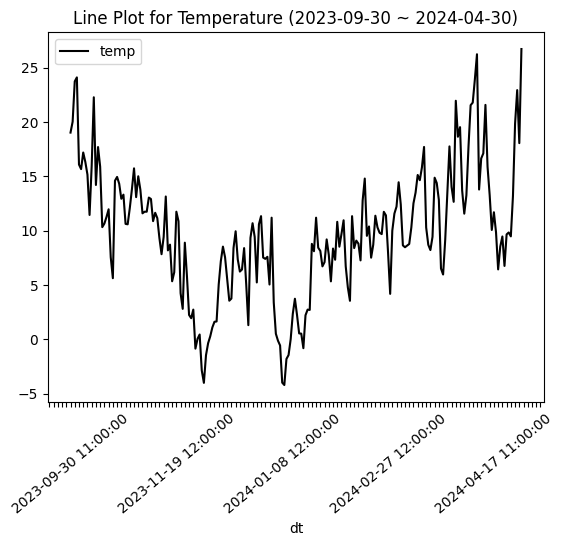

In [28]:
# Plot the temperature chart over the course of last heating period.
import matplotlib.pyplot as plt
# Create a bar plot
weather_hist_data.plot(kind="line", x = "dt", y = "temp", title="Line Plot for Temperature (2023-09-30 ~ 2024-04-30)", color = "black")
plt.xticks(rotation=40)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(2))

In [29]:
# General Info for the current data
weather_current_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dt           13 non-null     object 
 1   temp         13 non-null     float64
 2   description  13 non-null     object 
dtypes: float64(1), object(2)
memory usage: 416.0+ bytes


In [30]:
# Missing Values: There are no missing values
weather_current_data.isnull().sum()

dt             0
temp           0
description    0
dtype: int64

In [31]:
# Duplicated Rows: 0 duplicated rows
weather_current_data.duplicated().sum()

np.int64(0)

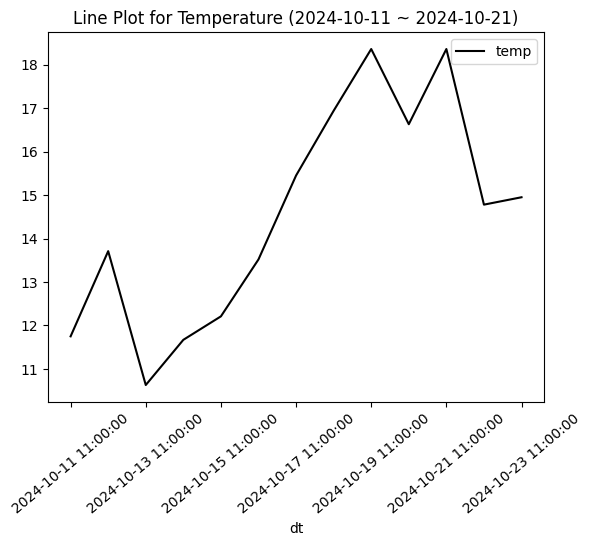

In [32]:
# Plot the temperature chart over the course of last heating period.
import matplotlib.pyplot as plt
# Create a bar plot
weather_current_data.plot(kind="line", x = "dt", y = "temp", title="Line Plot for Temperature (2024-10-11 ~ 2024-10-21)", color = "black")
plt.xticks(rotation=40)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(2))

In [33]:
### Basic EDA: Thermostat Data 
# Thermostat Data: General Info
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18259 entries, 496 to 18258
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   payload_id         18259 non-null  int64         
 1   received_at        18259 non-null  datetime64[ns]
 2   device_id          18259 non-null  object        
 3   openWindow         18259 non-null  bool          
 4   relativeHumidity   18259 non-null  float64       
 5   sensorTemperature  18259 non-null  float64       
 6   time_diff          18258 non-null  float64       
 7   temp_diff          18258 non-null  float64       
 8   humidity_diff      18258 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 1.3+ MB


In [34]:
# Thermostat Data: Missing Value Detection
df_new.isnull().sum()

payload_id           0
received_at          0
device_id            0
openWindow           0
relativeHumidity     0
sensorTemperature    0
time_diff            1
temp_diff            1
humidity_diff        1
dtype: int64

In [35]:
# Thermostat Data: Duplicated Rows
df_new.duplicated().sum()

np.int64(0)

In [36]:
# Thermostat Data: openWindow Distribution
df_new.openWindow.value_counts()

openWindow
False    18259
Name: count, dtype: int64

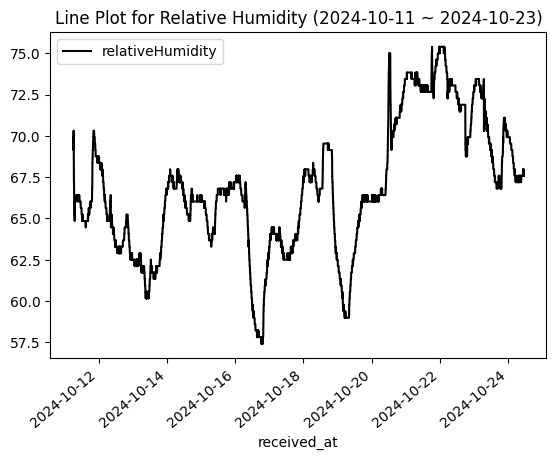

In [37]:
# Thermostat Data: relativeHumidity
df_new.plot(kind="line", x = "received_at", y = "relativeHumidity", title="Line Plot for Relative Humidity (2024-10-11 ~ 2024-10-23)", color = "black")
plt.xticks(rotation=40)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(2))

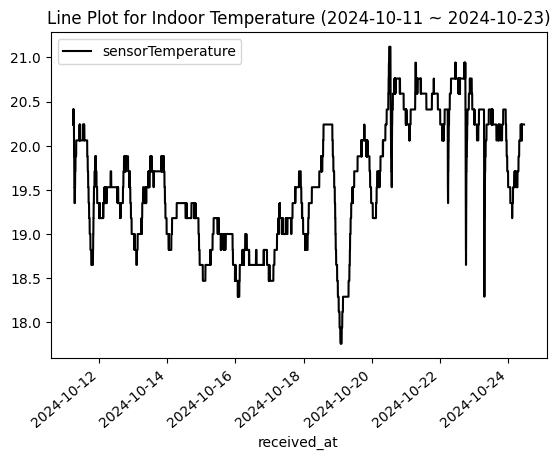

In [38]:
# Thermostat Data: sensorTemperature
df_new.plot(kind="line", x = "received_at", y = "sensorTemperature", title="Line Plot for Indoor Temperature (2024-10-11 ~ 2024-10-23)",color = "black")
plt.xticks(rotation=40)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(2))

In [39]:
### Basic EDA: The building data
building_df

,Perimeter (m),Facade Area (sqm),Window Area (sqm),Footprint Area (sqm),Roof Area (sqm),Basement Area (sqm)
0,135.422958,1592.573992,477.772198,621.390405,621.390405,621.390405


In [40]:
# Saving the dataset as a csv file
weather_hist_data.to_csv("Historical Weather Data.csv")
weather_current_data.to_csv("Current Weather Data.csv")
df_new.to_csv('data_export.csv', index = False)
building_df.to_csv('building.csv', index = False)

## Code | D. Compute relevant statistics | 2 points
#### Recommended deadline: from October 18th until October 21st
#### Deadline: October 24th at 01:29 pm CET

Get together as a group and ask yourselves: what business questions would you like to answer? For example:

- On which days are there maximum customer traffic?
- On which days do we expect to make more sales?
- How much inventory should we get? Why?
- Which impact would the weather conditions, local attractions or events have on your business?
- How would you like to develop the business in the future?
    - Do you wish to expand to new locations?
    - Launch a new product?
    - Target more elderly or young people?
    - Target vegetarian or book-worm people?

Compute descriptive statistics that inform you about the future of your business and enable you to answer the business questions.|


In [41]:
# Calculation of the energy saving.
# First step: Deciding the weather categories from the "description" column
# 1. Calculate counts of each category
category_counts = weather_hist_data['description'].value_counts()

# 2. Calculate proportions
total_counts = len(weather_hist_data)  # Total number of entries
category_proportions = category_counts / total_counts  # Proportions

# 3. Combine counts and proportions into a DataFrame
category_summary = pd.DataFrame({
    'Counts': category_counts,
    'Proportions': category_proportions
}).reset_index()

# 4. Rename columns for clarity
category_summary.columns = ['Weather Category', 'Counts', 'Proportions']
category_summary

,Weather Category,Counts,Proportions
0,overcast clouds,96,0.448598
1,light rain,48,0.224299
2,broken clouds,36,0.168224
3,scattered clouds,14,0.065421
4,clear sky,11,0.051402
5,few clouds,5,0.023364
6,light snow,2,0.009346
7,moderate rain,1,0.004673
8,snow,1,0.004673


In [42]:
### Heating Expense saving calculation
# For the setting we are an owner of a microliving building that has 68 studio rooms, each of them is 25m²
# The total annual heating cost for all 68 studios is €62,000
# Which means that the heating expense per studio is around €911.7647058823529
# Based on the OpenWeatherMap API weather condition's definition, the heating system will automatically turned off in "clear sky", "few clouds", "scatter clouds"
# We can only turn off the heating system for half a day in those 30 Days during last year's heating period.
# By turning off the heating system in those 30 days, a studio can save €63.85514018691589 in annual heating expense(roughly 7% of the annual heating expense).
# Plus using the heating system optimization, the thermostats and windows detection can save 8% and 9% respectively
# In conclusion, by adapting the heating system optimization, the building can save additional 17%
# Through calculation we can find that the heating cost with the heating system optimization is €47114.20560747664, saving roughly €14886 per year.

# Specify the categories
categories_of_interest = ['clear sky', 'scattered clouds', 'few clouds']

# Filter the DataFrame for the desired categories and sum the 'Counts'
count_day_off = int(category_summary[category_summary['Weather Category'].isin(categories_of_interest)]['Counts'].sum())

# The annual building heating cost without heating system optimization and the number of rooms
annual_building_cost = 62000
number_of_rooms = 68

# Thermostats & windows detection savings percentage
thermostats_percent = 0.09
windows_detection_percent = 0.08

# Calculation of the Heating cost for Heating system with Optimization
day_off_ratio = (count_day_off / (214 * 2))
per_studio_saving = (annual_building_cost / number_of_rooms) * day_off_ratio
thermostats_percent = 0.09
windows_detection_percent = 0.08
annual_building_expense_with_heating = annual_building_cost - ((per_studio_saving * number_of_rooms) + annual_building_cost * (thermostats_percent + windows_detection_percent))
annual_building_expense_with_heating

47114.20560747664

In [43]:
# Renovation Cost Calculation
cost_per_square_meter = 280  # in euros

# Calculate the facade insulation cost
facade_insulation_cost = facade_area * cost_per_square_meter

# Print the result with a verbal description
print(f"The facade area of the building is {facade_area:.2f} square meters.")
print(f"At a rate of {cost_per_square_meter} euros per square meter, the total cost for insulating the facade is {facade_insulation_cost:.2f} euros.")

# Window area is 30% of the facade area
window_area_percentage = 0.30
window_area = facade_area * window_area_percentage

# Cost per square meter for window installation
cost_per_square_meter_window = 770  # in euros

# Calculate the total cost for windows
window_installation_cost = window_area * cost_per_square_meter_window

# Print the results with verbal descriptions
print(f"The window area, which is {window_area_percentage * 100:.0f}% of the facade area, is {window_area:.2f} square meters.")
print(f"At a rate of {cost_per_square_meter_window} euros per square meter, the total cost for window installation is {window_installation_cost:.2f} euros.")

# Cost per square meter for roof installation
cost_per_square_meter_roof = 338  # in euros

# Calculate the total cost for the roof
roof_installation_cost = roof_area * cost_per_square_meter_roof

# Print the results with verbal descriptions
print(f"The roof area of the building is {roof_area:.2f} square meters.")
print(f"At a rate of {cost_per_square_meter_roof} euros per square meter, the total cost for roof installation is {roof_installation_cost:.2f} euros.")

# Cost per square meter for basement construction
cost_per_square_meter_basement = 131  # in euros

# Calculate the total cost for the basement
basement_construction_cost = basement_area * cost_per_square_meter_basement

# Print the results with verbal descriptions
print(f"The basement area of the building is {basement_area:.2f} square meters.")
print(f"At a rate of {cost_per_square_meter_basement} euros per square meter, the total cost for constructing the basement is {basement_construction_cost:.2f} euros.")

# Compute the total renovation cost
total_renovation_cost = (facade_insulation_cost + 
                         window_installation_cost + 
                         roof_installation_cost + 
                         basement_construction_cost)

# Print the result with a verbal description
print(f"The total renovation cost, including the facade insulation, window replacements, roof insulation, and basement insulation, is {total_renovation_cost:.2f} euros.")

# Assumed percentages for relative energy savings based on typical industry values (in decimal form)
savings_facade = 0.20  # 20% savings from facade insulation
savings_window = 0.15  # 15% savings from window installation
savings_roof = 0.10    # 10% savings from roof installation
savings_basement = 0.07  # 7% savings from basement insulation

# Annual heating cost of the building
annual_heating_cost = 62000  # in euros

# Calculate the potential savings from each measure
savings_from_facade = annual_heating_cost * savings_facade
savings_from_window = annual_heating_cost * savings_window
savings_from_roof = annual_heating_cost * savings_roof
savings_from_basement = annual_heating_cost * savings_basement

# Calculate the total potential savings
total_potential_savings = (savings_from_facade + 
                           savings_from_window + 
                           savings_from_roof + 
                           savings_from_basement)

# Results
print(f"Estimated energy savings from facade insulation: {savings_from_facade:.2f} euros ({savings_facade * 100:.0f}%)")
print(f"Estimated energy savings from window installation: {savings_from_window:.2f} euros ({savings_window * 100:.0f}%)")
print(f"Estimated energy savings from roof installation: {savings_from_roof:.2f} euros ({savings_roof * 100:.0f}%)")
print(f"Estimated energy savings from basement insulation: {savings_from_basement:.2f} euros ({savings_basement * 100:.0f}%)")
print(f"Total potential energy savings: {total_potential_savings:.2f} euros per year.")

The facade area of the building is 1592.57 square meters.
At a rate of 280 euros per square meter, the total cost for insulating the facade is 445920.72 euros.
The window area, which is 30% of the facade area, is 477.77 square meters.
At a rate of 770 euros per square meter, the total cost for window installation is 367884.59 euros.
The roof area of the building is 621.39 square meters.
At a rate of 338 euros per square meter, the total cost for roof installation is 210029.96 euros.
The basement area of the building is 621.39 square meters.
At a rate of 131 euros per square meter, the total cost for constructing the basement is 81402.14 euros.
The total renovation cost, including the facade insulation, window replacements, roof insulation, and basement insulation, is 1105237.41 euros.
Estimated energy savings from facade insulation: 12400.00 euros (20%)
Estimated energy savings from window installation: 9300.00 euros (15%)
Estimated energy savings from roof installation: 6200.00 euros 

## Code | E. Clean and clear visualisations  | 3 points
#### Deadline: October 24th at 01:29 pm CET

Create **at least 3 data visualisations** that clearly state your point and support your decision-making. 


**Presentation: present each data visualisation and integrate them in your storytelling. Explain why they are relevant for your decision-making.**

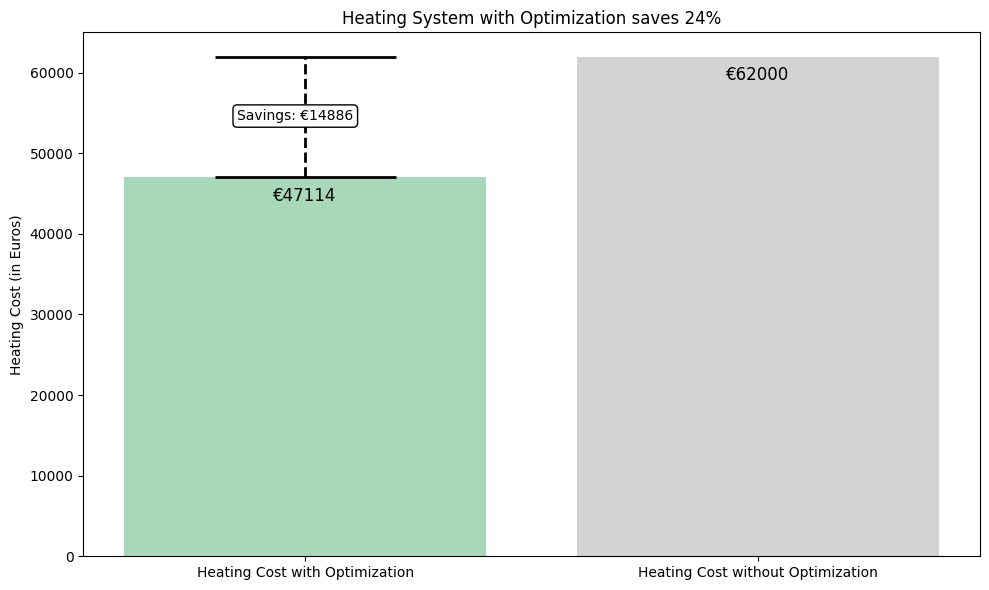

In [44]:
import matplotlib.pyplot as plt
import numpy as np
# Plot 1: Heating System with Optimization saving comparison
# Preparing the data for visualization: Heating Expense Comparison
heating_plot_df = pd.DataFrame({
    "Category" : ['Heating Cost with Optimization', 'Heating Cost without Optimization'],
    "Expenses" : [annual_building_expense_with_heating, annual_building_cost]
})

# Create the bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(heating_plot_df.Category, heating_plot_df.Expenses, color=['#A8D8B9', '#D3D3D3'])

# Add labels and title
plt.ylabel('Heating Cost (in Euros)')
plt.title('Heating System with Optimization saves 24%')

# Calculate the difference between the two expenses
expense_difference = annual_building_cost - annual_building_expense_with_heating

# Annotate the difference with a label on the lower bar
plt.annotate(f'Savings: €{round(expense_difference)}',
             xy=(0, annual_building_expense_with_heating),  # Position it at the top of the lower bar
             xytext=(-0.15, annual_building_expense_with_heating + 7500),  # Place the label slightly above the lower bar
             textcoords='data',  
             ha='left', va='center',
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

# Draw a vertical dotted line at the position of the lower bar
plt.plot([0, 0], [annual_building_expense_with_heating, annual_building_cost], color='black', linewidth=2, linestyle='--')  # Vertical line

# Draw horizontal lines at the top of both bars
plt.hlines(annual_building_expense_with_heating, xmin=-0.2, xmax=0.2, color='black', linewidth=2)  # Horizontal line at top of lower bar
plt.hlines(annual_building_cost, xmin=-0.2, xmax=0.2, color='black', linewidth=2)  # Horizontal line at top of higher bar

# Adjust the y-limits for better visibility of lines
plt.ylim(0, annual_building_cost + 3000)  # Extend the upper limit for better visibility

# Add text labels on the bars
plt.text(0, annual_building_expense_with_heating - 3000, f'€{round(annual_building_expense_with_heating)}', ha='center', color='black', fontsize=12)  # Text for lower bar
plt.text(1, annual_building_expense_with_heating + 12000, f'€{round(annual_building_cost)}', ha='center', color='black', fontsize=12)  # Text for higher bar

# Show the plot
plt.tight_layout()
# Show the plot
plt.show()



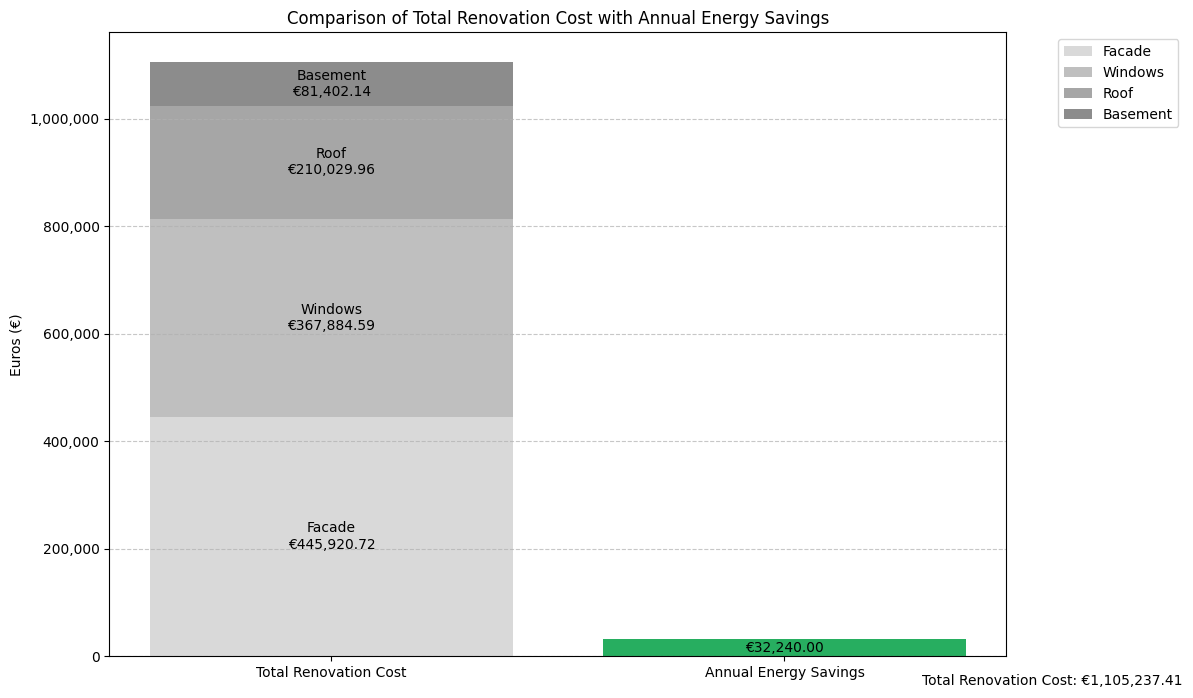

In [46]:
# Second Plot: Comparison of Total Renovation Cost with Annual Energy Savings
import matplotlib.pyplot as plt

# Individual costs
facade_insulation_cost = 445920.72
window_installation_cost = 367884.59
roof_installation_cost = 210029.96
basement_construction_cost = 81402.14

# Calculate total renovation cost
total_renovation_cost = (facade_insulation_cost + 
                        window_installation_cost + 
                        roof_installation_cost + 
                        basement_construction_cost)

# Annual energy savings
annual_energy_savings = 32240.00

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 7))

# Create stacked bar for renovation cost with shades of gray
bottom = 0
colors = ['#d9d9d9', '#bfbfbf', '#a6a6a6', '#8c8c8c']  # Different shades of gray
components = [facade_insulation_cost, window_installation_cost, 
              roof_installation_cost, basement_construction_cost]
labels = ['Facade', 'Windows', 'Roof', 'Basement']

for cost, color, label in zip(components, colors, labels):
    ax.bar('Total Renovation Cost', cost, bottom=bottom, 
           color=color, label=label)
    ax.text('Total Renovation Cost', bottom + cost/2,
            f'{label}\n€{cost:,.2f}',
            ha='center', va='center')
    bottom += cost

# Add bar for annual energy savings
ax.bar('Annual Energy Savings', annual_energy_savings, 
       color='#27ae60')  # Keep green for contrast
ax.text('Annual Energy Savings', annual_energy_savings/2,
        f'€{annual_energy_savings:,.2f}',
        ha='center', va='center')

# Customize the chart
ax.set_title('Comparison of Total Renovation Cost with Annual Energy Savings')
ax.set_ylabel('Euros (€)')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add total cost annotation
plt.figtext(0.99, 0.01, f'Total Renovation Cost: €{total_renovation_cost:,.2f}', 
            ha='right', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

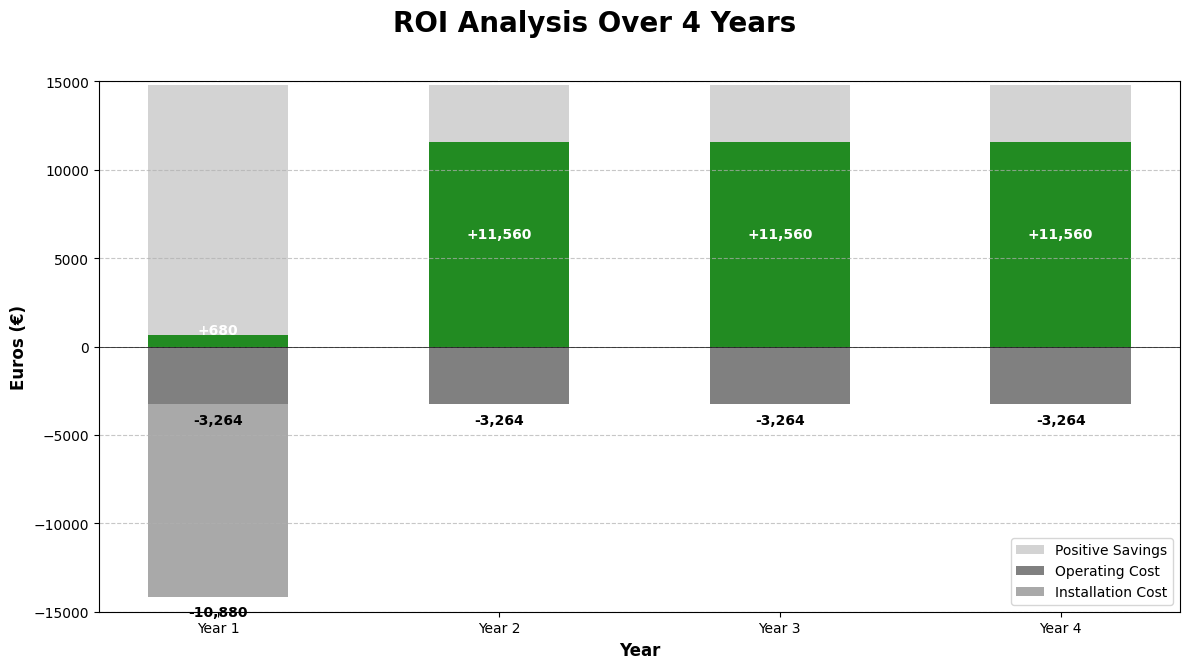

In [47]:
# Plot3: ROI Analysis Over 4 Years
import matplotlib.pyplot as plt

# Data definition
positive_savings = 14824
base_value = 680
operating_cost = -3264
installation_cost = -10880
net_savings = 11560

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 7))

# Plot Year 1
ax.bar(0, positive_savings, width=0.5, color='lightgray', label='Positive Savings')
ax.bar(0, base_value, width=0.5, color='forestgreen')  # Removed hatch pattern
ax.bar(0, operating_cost, width=0.5, bottom=0, color='gray', label='Operating Cost')
ax.bar(0, installation_cost, width=0.5, bottom=operating_cost, color='darkgray', label='Installation Cost')

# Plot Years 2-4
for i in range(1, 4):
    ax.bar(i, positive_savings, width=0.5, color='lightgray')
    ax.bar(i, operating_cost, width=0.5, bottom=0, color='gray')
    ax.bar(i, net_savings, width=0.5, color='forestgreen')  # Removed hatch pattern

# Enhanced value labels
def add_value_label(x, y, value):
    text_color = 'white' if value > 0 else 'black'
    if value < 0:
        va = 'top'
        y = y - 500
    else:
        va = 'bottom'
        y = y + 200
    ax.text(x, y, f'{value:,}' if value < 0 else f'+{value:,}', 
            ha='center', va=va, fontsize=10, fontweight='bold', color=text_color)

# Add all labels
add_value_label(0, positive_savings, positive_savings)
add_value_label(0, base_value/2, base_value)
add_value_label(0, operating_cost, operating_cost)
add_value_label(0, installation_cost + operating_cost, installation_cost)

for i in range(1, 4):
    add_value_label(i, positive_savings, positive_savings)
    add_value_label(i, operating_cost, operating_cost)
    add_value_label(i, net_savings/2, net_savings)

# Customize plot
plt.suptitle('ROI Analysis Over 4 Years', fontsize=20, fontweight='bold', y=0.95)
ax.set_ylabel('Euros (€)', fontsize=12, fontweight='bold')
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_xticks(range(4))
ax.set_xticklabels(['Year 1', 'Year 2', 'Year 3', 'Year 4'], fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(fontsize=10)

ax.set_ylim(-15000, 15000)
ax.axhline(y=0, color='black', linewidth=0.5)

plt.subplots_adjust(top=0.85)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

## Presentation | 15 points
#### Deadline: October 24th during class

> Make a presentation about your business, the data you've collected and the direction you're taking the business in the next months.

**Presentation | 1. Description of unique business idea | 1 point**

Summarise the name and choice of business as well as location and the time of year it operates (you can add some branding, logo, etc.)


**Presentation | 2. Presentation of all the APIs used and how it serves your business | 3 points**

Present each API and explain why the collected data is relevant for your business.


**Presentation | 3. Presentation of the data cleaning and processing | 2 points**

Explain the steps your team took in order to get to a clean and structured dataset.


**Presentation | 4. Presentation of the statistics  & 5. Data visualisations | 5 points**

Display the statistics and relevant data visualisations that helped you make informed decisions about your business. The descriptive statistics and visualisations enable you to draw conclusions that take your business in one or the other direction. You need to explain how this information serves your business and the next steps you will take.

**Presentation | 6. Storytelling | 4 points**

Why did you pick this business idea? Why this name?

Who is your target audience? What problem does it solve?

What decisions did you make to make your business thrive in the future? What are your current challenges? Opportunities?

Can Data save your business or make it expand to new territories?


Create a good story!